# TRATAMENTOS DOS DADOS<br>

> ## Micro dados inep: dataset Escolas.csv

In [1]:
diretorio_datasets = "/home/matteus-paula/Downloads/dados_inep"

Inclusão da biblioteca Pandas do Python para exploratoria e analise dos dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dados_escolas = pd.read_csv(f'{diretorio_datasets}/ESCOLAS.CSV', 
                            delimiter="|", encoding = "ISO-8859-1")

/home/matteus-paula/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dados_escolas.head()

,NU_ANO_CENSO,CO_ENTIDADE,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,...,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
0,2017,50032062,CENTRO DE EDUCACAO INFANTIL GERALDO ANTONIO LOPES,NaN,1,06/02/2017,11/12/2017,5,5004,50010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,11016094,IEE MARECHAL RONDON,00007,1,06/02/2017,29/12/2017,1,1102,11004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,21079196,ESCOLA MUNICIPAL BARRO BRANCO,00004,1,21/02/2017,29/12/2017,2,2102,21008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,51062879,ESCOLA MUNICIPAL PROFESSORA MARIA LUIZA DE ARA...,51021,1,13/02/2017,21/12/2017,5,5104,51017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,31051659,EM JOSE LEOCADIO DOS SANTOS,00039,1,06/02/2017,15/12/2017,3,3108,31036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Filtrando as escolas, de acordo com os filtros informados pela documentação: 
- O filtro TP_SITUACAO_FUNCIONAMENTO=1 diz respeito à escola que está Em atividade
- O filtro (IN_REGULAR=1 OR IN_EJA=1 OR IN_PROFISSIONALIZANTE=1) diz respeito às escolas com pelo menos uma matrícula em turma de Escolarização.

In [56]:
escolas = dados_escolas.loc[(dados_escolas['TP_SITUACAO_FUNCIONAMENTO'] == 1) 
                      & (
                          (dados_escolas['IN_REGULAR'] == 1)
                            |(dados_escolas['IN_EJA'] == 1
                             |(dados_escolas['IN_PROFISSIONALIZANTE'] == 1))
                      )]

- ### Seleção das variaveis a serem estudadas

In [57]:
df_all = escolas[['CO_ENTIDADE', 'TP_DEPENDENCIA', 
                  'CO_UF', 'CO_MUNICIPIO',
                  'IN_COMUM_PRE', 'IN_COMUM_FUND_AI', 
                  'IN_COMUM_FUND_AF', 'IN_COMUM_MEDIO_NORMAL',
                  'IN_COMUM_MEDIO_MEDIO', 'IN_COMUM_MEDIO_INTEGRADO', 
                  'IN_AGUA_INEXISTENTE', 'IN_AGUA_FILTRADA', 
                  'IN_ESGOTO_INEXISTENTE','IN_BIBLIOTECA_SALA_LEITURA',
                 'IN_BANHEIRO_FORA_PREDIO', 'IN_BANHEIRO_DENTRO_PREDIO', 
                 'IN_REFEITORIO', 'IN_AUDITORIO',
                 'IN_COMPUTADOR', 'IN_INTERNET',
                 'IN_BANDA_LARGA', 'IN_ALIMENTACAO',
                 'IN_PATIO_COBERTO', 'IN_PATIO_DESCOBERTO',
                 'IN_AREA_VERDE', 'IN_LABORATORIO_CIENCIAS', 
                 'IN_LABORATORIO_INFORMATICA', 'IN_ENERGIA_INEXISTENTE', 
                 'IN_LIXO_RECICLA', 'IN_QUADRA_ESPORTES', 
                 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
                 'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
                 'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA', 
                 #'NU_COMP_ALUNO',
                 'IN_DEPENDENCIAS_PNE', 'TP_ATIVIDADE_COMPLEMENTAR']]

- ### Verificando a variação e a distribuição dos dados

In [14]:
df_all.describe()

,CO_ENTIDADE,TP_DEPENDENCIA,CO_UF,CO_MUNICIPIO,IN_COMUM_PRE,IN_COMUM_FUND_AI,IN_COMUM_FUND_AF,IN_COMUM_MEDIO_NORMAL,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,...,IN_LIXO_RECICLA,IN_QUADRA_ESPORTES,IN_EQUIP_TV,IN_EQUIP_DVD,IN_EQUIP_PARABOLICA,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_EQUIP_MULTIMIDIA,IN_DEPENDENCIAS_PNE,TP_ATIVIDADE_COMPLEMENTAR
count,1.816110e+05,181611.000000,181611.000000,1.816110e+05,181611.000000,181611.000000,181611.000000,181611.000000,181611.000000,181611.000000,...,181611.000000,181611.000000,181611.000000,181611.000000,181611.000000,181611.000000,181611.000000,181611.000000,181611.000000,181611.000000
mean,3.043359e+07,3.034805,30.266834,3.041428e+06,0.574585,0.624764,0.342386,0.006470,0.150173,0.010522,...,0.066191,0.348922,0.816101,0.749883,0.216011,0.439158,0.654657,0.565527,0.290285,0.224105
std,9.665325e+06,0.622102,9.661779,9.699549e+05,0.494407,0.484185,0.474509,0.080175,0.357242,0.102038,...,0.248616,0.476630,0.387403,0.433081,0.411523,0.496286,0.475481,0.495689,0.453895,0.416993
min,1.100002e+07,1.000000,11.000000,1.100015e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.323650e+07,3.000000,23.000000,2.309706e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.107447e+07,3.000000,31.000000,3.109402e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,3.529522e+07,3.000000,35.000000,3.549904e+06,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,5.308800e+07,4.000000,53.000000,5.300108e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- ### Verificando os dados omissos

In [8]:
df_all.isnull().any()

CO_ENTIDADE                   False
TP_DEPENDENCIA                False
CO_UF                         False
CO_MUNICIPIO                  False
IN_COMUM_PRE                  False
IN_COMUM_FUND_AI              False
IN_COMUM_FUND_AF              False
IN_COMUM_MEDIO_NORMAL         False
IN_COMUM_MEDIO_MEDIO          False
IN_COMUM_MEDIO_INTEGRADO      False
IN_AGUA_INEXISTENTE           False
IN_AGUA_FILTRADA              False
IN_ESGOTO_INEXISTENTE         False
IN_BIBLIOTECA_SALA_LEITURA    False
IN_BANHEIRO_FORA_PREDIO       False
IN_BANHEIRO_DENTRO_PREDIO     False
IN_REFEITORIO                 False
IN_AUDITORIO                  False
IN_COMPUTADOR                 False
IN_INTERNET                   False
IN_BANDA_LARGA                False
IN_ALIMENTACAO                False
IN_PATIO_COBERTO              False
IN_PATIO_DESCOBERTO           False
IN_AREA_VERDE                 False
IN_LABORATORIO_CIENCIAS       False
IN_LABORATORIO_INFORMATICA    False
IN_ENERGIA_INEXISTENTE      

- ### A variavel IN_BANDA_LARGA é a unica com dados Omissos

In [9]:
total = '{:,}'.format(df_all['CO_ENTIDADE'].loc[df_all['IN_BANDA_LARGA'].isnull()].count())
print("Total de dados omissos " + total)

Total de dados omissos 0


- ### Convertendo os nan ou nulos da variavel IN_BANDA_LARGA para zero

In [134]:
df_all.loc[df_all['IN_BANDA_LARGA'].isnull(), 'IN_BANDA_LARGA'] = 0

/home/matteus-paula/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


- ### Verificando dados duplicados

In [16]:
print(df_all['CO_ENTIDADE'].count())
print(df_all['CO_ENTIDADE'].drop_duplicates().count())

181611
181611


In [17]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181611 entries, 0 to 246577
Data columns (total 38 columns):
CO_ENTIDADE                   181611 non-null int64
TP_DEPENDENCIA                181611 non-null int64
CO_UF                         181611 non-null int64
CO_MUNICIPIO                  181611 non-null int64
IN_COMUM_PRE                  181611 non-null float64
IN_COMUM_FUND_AI              181611 non-null float64
IN_COMUM_FUND_AF              181611 non-null float64
IN_COMUM_MEDIO_NORMAL         181611 non-null float64
IN_COMUM_MEDIO_MEDIO          181611 non-null float64
IN_COMUM_MEDIO_INTEGRADO      181611 non-null float64
IN_AGUA_INEXISTENTE           181611 non-null float64
IN_AGUA_FILTRADA              181611 non-null float64
IN_ESGOTO_INEXISTENTE         181611 non-null float64
IN_BIBLIOTECA_SALA_LEITURA    181611 non-null float64
IN_BANHEIRO_FORA_PREDIO       181611 non-null float64
IN_BANHEIRO_DENTRO_PREDIO     181611 non-null float64
IN_REFEITORIO                 181

> ## Dados ideb:<br> 
- divulgacao_anos_iniciais-escolas-2017
- divulgacao_anos_finais-escolas-2017
- divulgacao_ensino_medio-escolas-2017

In [10]:
diretorio = f'{diretorio_datasets}/dados_ideb/divulgacao_ensino_medio_municipios2017-atualizado-Jun_2019.xlsx'
ideb_ensino_medio = pd.read_excel(diretorio, header=None)

In [11]:
diretorio = f'{diretorio_datasets}/dados_ideb/divulgacao_anos_iniciais_municipios2017-atualizado-Jun_2019.xlsx'
ideb_ensino_fund_iniciais = pd.read_excel(diretorio, header=None)

In [12]:
diretorio = f'{diretorio_datasets}/dados_ideb/divulgacao_anos_finais_municipios2017-atualizado-Jun_2019.xlsx'
ideb_ensino_fund_finais = pd.read_excel(diretorio, header=None)

In [13]:
def transform_dataframe_medio(input_df):

    cols = list(input_df.columns)
    header = input_df.iloc[6]
    #header = pd.concat([pd.Series(header[c].dropna().values, name=c) for c in header], axis=1).iloc[0]
    header = header.replace(r'\n',' ', regex=True)

    dfs = input_df.iloc[10:]
    dfs.columns = header

#     dfs_1 = dfs[['Código da Escola', 'Nome da Escola',
#                  'Sigla da UF', 'Nome do Município', 'IDEB 2017 (N x P)']]
    
    dfs_1 = dfs[['Sigla da UF', 'Código do Município',
                 'Nome do Município', 'Rede', 'IDEB 2017 (N x P)']]

    dfs_1.drop(dfs_1.tail(3).index,inplace=True)
    
#     dfs_1.columns = ['CO_ENTIDADE', 'NO_ENTIDADE',
#                      'SIGLA_UF', 'NO_MUNICIPIO', 'NOTA_IDEB']
    
    dfs_1.columns = ['SIGLA_UF', 'CO_MUNICIPIO',
                     'NO_MUNICIPIO', 'REDE', 'NOTA_IDEB']

    return dfs_1

In [14]:
def transform_dataframe_fund(input_df):

    cols = list(input_df.columns)
    header = input_df.iloc[6]
    #header = pd.concat([pd.Series(header[c].dropna().values, name=c) for c in header], axis=1).iloc[0]
    header = header.replace(r'\n',' ', regex=True)

    dfs = input_df.iloc[10:]
    dfs.columns = header

    dfs_1 = dfs[['Sigla da UF', 'Código do Município',
                 'Nome do Município', 'Rede', 'IDEB 2017 (N x P)']]

    dfs_1.drop(dfs_1.tail(3).index,inplace=True)
    
    dfs_1.columns = ['SIGLA_UF', 'CO_MUNICIPIO',
                     'NO_MUNICIPIO', 'REDE', 'NOTA_IDEB']

    return dfs_1

In [15]:
out_df_ideb_ensino_medio = transform_dataframe_medio(ideb_ensino_medio)
out_df_ideb_ensino_medio.head()

/home/matteus-paula/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,SIGLA_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,NOTA_IDEB
10,RO,1100015,Alta Floresta D'Oeste,Estadual,3.9
11,RO,1100015,Alta Floresta D'Oeste,Pública,3.9
12,RO,1100023,Ariquemes,Pública,3.8
13,RO,1100023,Ariquemes,Estadual,3.8
14,RO,1100031,Cabixi,Estadual,3.7


In [32]:
out_df_ideb_ensino_fund_iniciais = transform_dataframe_fund(ideb_ensino_fund_iniciais)
out_df_ideb_ensino_fund_iniciais.head()

,SIGLA_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,NOTA_IDEB
10,RO,1100015,Alta Floresta D'Oeste,Estadual,6.2
11,RO,1100015,Alta Floresta D'Oeste,Municipal,5.1
12,RO,1100015,Alta Floresta D'Oeste,Pública,6.2
13,RO,1100023,Ariquemes,Estadual,6
14,RO,1100023,Ariquemes,Municipal,5.4


In [16]:
out_df_ideb_ensino_fund_finais = transform_dataframe_fund(ideb_ensino_fund_finais)
out_df_ideb_ensino_fund_finais.head()

,SIGLA_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,NOTA_IDEB
10,RO,1100015,Alta Floresta D'Oeste,Estadual,5.1
11,RO,1100015,Alta Floresta D'Oeste,Municipal,4.3
12,RO,1100015,Alta Floresta D'Oeste,Pública,4.8
13,RO,1100023,Ariquemes,Estadual,5
14,RO,1100023,Ariquemes,Municipal,4.7


In [17]:
out_df_ideb_ensino_medio = out_df_ideb_ensino_medio[out_df_ideb_ensino_medio['REDE'] == 'Pública']
#out_df_ideb_ensino_fund_iniciais = out_df_ideb_ensino_fund_iniciais[out_df_ideb_ensino_fund_iniciais['REDE'] == 'Pública']
out_df_ideb_ensino_fund_finais = out_df_ideb_ensino_fund_finais[out_df_ideb_ensino_fund_finais['REDE'] == 'Pública']

In [58]:
concat_df = [out_df_ideb_ensino_medio, out_df_ideb_ensino_fund_finais]
result_1 = pd.concat(concat_df)

result_1['NOTA_IDEB'] = pd.to_numeric(result_1['NOTA_IDEB'],errors='coerce')

columns = ['SIGLA_UF','CO_MUNICIPIO', 'NO_MUNICIPIO', 'REDE']
final_result = result_1.groupby(columns, as_index=False).mean()

In [19]:
final_result.head()

,SIGLA_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,NOTA_IDEB
0,AC,1200013,Acrelândia,Pública,4.05
1,AC,1200054,Assis Brasil,Pública,3.90
2,AC,1200104,Brasiléia,Pública,5.00
3,AC,1200138,Bujari,Pública,3.90
4,AC,1200179,Capixaba,Pública,4.00


In [37]:
final_result.isnull().any()

SIGLA_UF        False
CO_MUNICIPIO    False
NO_MUNICIPIO    False
REDE            False
NOTA_IDEB        True
dtype: bool

In [21]:
final_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5569 entries, 0 to 5568
Data columns (total 5 columns):
SIGLA_UF        5569 non-null object
CO_MUNICIPIO    5569 non-null int64
NO_MUNICIPIO    5569 non-null object
REDE            5569 non-null object
NOTA_IDEB       5536 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 261.0+ KB


In [22]:
final_result.describe()

,CO_MUNICIPIO,NOTA_IDEB
count,5.569000e+03,5536.000000
mean,3.253283e+06,3.988566
std,9.848221e+05,0.678659
min,1.100015e+06,2.100000
25%,2.512101e+06,3.500000
50%,3.146255e+06,4.000000
75%,4.119103e+06,4.500000
max,5.300108e+06,6.400000


In [59]:
dados_ideb = final_result[['CO_MUNICIPIO', 'NOTA_IDEB']][final_result['NOTA_IDEB'].notnull()]
dados_ideb.count()

CO_MUNICIPIO    5536
NOTA_IDEB       5536
dtype: int64

In [69]:
all_escolas = pd.merge(df_final, dados_ideb, on='CO_MUNICIPIO', how='inner')

In [208]:
all_escolas[['CO_MUNICIPIO', 'CO_UF', 'IN_REFEITORIO', 'IN_ALIMENTACAO', 'IN_PATIO',
             'IN_BIBLIOTECA_SALA_LEITURA', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET', 'IN_AGUA_FILTRADA',
             'IN_BANDA_LARGA', 'IN_LABORATORIO_CIENCIAS', 
             'IN_LABORATORIO_INFORMATICA', 
             #'QT_COMP_ALUNO', 
             'IN_QUADRA_ESPORTES','IN_BANHEIRO', 'IN_AREA_VERDE',
             'IN_DEPENDENCIAS_PNE', 'IN_ENERGIA_EXISTENTE',
             'IN_LIXO_RECICLA']] \
            [(all_escolas['NOTA_IDEB'] < 3)].head()

# Notas abaixo de 5 - 29354
#         -> com internet 23.548 -     80%
#         -> laboratorio ciencias 4749 16%
#         -> com computador 27575      93% 
#         -> biblioteca leitura 19307  65%  
#         -> laboratorio info 17227    58%    
#         -> banda larga 18407         62%
#         -> quadra esporte 14550      49%
#         -> area verde 8365           28%


# Notas acima de 5 - 29734
#         -> com internet 28003         94%
#         -> laboratorio ciencias 3939  13%
#         -> com computador 29331       98%
#         -> biblioteca leitura 22906   77%
#         -> laboratorio info 20588     69%
#         -> banda larga 24099          81%
#         -> quadra esporte 19579       65%       
#         -> area verde 10367           34%

# ESTADOS: 23 (Ceara), 31 (Minas), 33 (Rio de Janeiro), 35 (Sao Paulo), 41 (Paraná), 
#   42 (Santa Catarina), 43 (Rio Grande do Sul), 52 (Goiás)

# Notas acima de 8 - 175
#         -> com internet 164
#         -> laboratorio ciencias 8
#         -> com computador 175
#         -> biblioteca leitura 132
#         -> laboratorio info 113
#         -> banda larga 120
#         -> quadra esporte 99
#         -> area verde 72

# Escolas Federais - 163 Nota >= 5 115 70%
# Escolas Estaduais - 19335 Nota >= 5 7782  40%
# Escolas municipais - 38743 Nota >= 5 21125 54%
# Escolas privadas - 847  Nota >= 5 712 84%

,CO_MUNICIPIO,CO_UF,IN_REFEITORIO,IN_ALIMENTACAO,IN_PATIO,IN_BIBLIOTECA_SALA_LEITURA,IN_AUDITORIO,IN_COMPUTADOR,IN_INTERNET,IN_AGUA_FILTRADA,IN_BANDA_LARGA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_QUADRA_ESPORTES,IN_BANHEIRO,IN_AREA_VERDE,IN_DEPENDENCIAS_PNE,IN_ENERGIA_EXISTENTE,IN_LIXO_RECICLA
68,1200435,12,5,100,3,5,2,22,5,33,0,3,10,2,27,2,5,10,0
96,1301605,13,22,100,2,22,0,17,17,25,12,3,10,5,78,73,0,85,0
104,1302108,13,14,100,7,10,0,24,17,19,7,0,12,2,64,76,5,29,0
142,1400282,14,30,100,25,20,0,40,10,20,5,5,15,15,45,0,0,45,0
152,1500206,15,13,99,25,12,1,22,12,21,12,2,10,5,85,4,3,69,1


<br>

<br>

In [35]:
municipios_est_pop = pd.read_excel(f'{diretorio_datasets}/estimativa_TCU_2017_20190919.xls', header=None, sheet_name='Municípios')

In [77]:
def transform_mun_pop(input_df):

    header = input_df.iloc[1]

    dfs = input_df.iloc[2:]
    dfs.columns = ['UF', 'COD_UF', 'COD_MUN', 'NM_MUNICIPIO', 'NUM_POPULACAO']
    
    f = lambda x, y : str(x).strip() + str(y).strip()
    #f = lambda x, y : int(str(x) + str(y))
    dfs['COD_MUNIC'] = dfs[['COD_UF', 'COD_MUN']].apply(lambda x: f(*x), axis=1)
    
    dfs.drop(dfs.tail(16).index,inplace=True)
    
    return dfs

In [168]:
municipios_est_pop_df = transform_mun_pop(municipios_est_pop)
municipios_est_pop_df['COD_MUNIC'] = municipios_est_pop_df['COD_MUNIC'].astype(int)

municipios_est_pop_df['NUM_POPULACAO'] = municipios_est_pop_df['NUM_POPULACAO'].astype(str)

municipios_est_pop_df['NUM_POPULACAO'] = municipios_est_pop_df['NUM_POPULACAO'].str.replace(r'\.|[^\d]*\(\d+\)$', '').astype(int)
municipios_est_pop_df.head()

/home/matteus-paula/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/matteus-paula/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/matteus-paula/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,UF,COD_UF,COD_MUN,NM_MUNICIPIO,NUM_POPULACAO,COD_MUNIC
2,RO,11,00015,Alta Floresta D'Oeste,25437,1100015
3,RO,11,00023,Ariquemes,107345,1100023
4,RO,11,00031,Cabixi,6224,1100031
5,RO,11,00049,Cacoal,88507,1100049
6,RO,11,00056,Cerejeiras,17934,1100056


In [179]:
#municipios_est_pop_df.NUM_POPULACAO.str.contains('.')
#municipios_est_pop_df.head(20)

pd.api.types.is_numeric_dtype(municipios_est_pop_df['NUM_POPULACAO'])

True

In [169]:
municipios = pd.read_csv(f'{diretorio_datasets}/tb_municip.csv', 
                            delimiter=";", encoding = "ISO-8859-1",
                        names=["CO_MUNICIP","CO_MUNICDV","CO_STATUS","CO_TIPO",
                               "DS_NOME","DS_NOMEPAD","DS_OBSERV","CO_ALTER",
                               "CO_ALTERDV","CO_REGIAO","CO_UF","IN_CAPITAL",
                               "IN_AMAZLEG","IN_SEMIAR","IN_FRONTZN","IN_FRONTFX",
                               "IN_POBREZA","DT_INSTAL","DT_EXTIN","CO_SUCESS",
                               "NU_ORDEM","NU_ORDMAP","NU_LATITUD","NU_LONGIT","NU_ALTITUD","NU_AREA"])

In [82]:
municipios.head()

,CO_MUNICIP,CO_MUNICDV,CO_STATUS,CO_TIPO,DS_NOME,DS_NOMEPAD,DS_OBSERV,CO_ALTER,CO_ALTERDV,CO_REGIAO,...,IN_POBREZA,DT_INSTAL,DT_EXTIN,CO_SUCESS,NU_ORDEM,NU_ORDMAP,NU_LATITUD,NU_LONGIT,NU_ALTITUD,NU_AREA
0,0,0,IGNOR,IGNOR,Ignorado ou exterior,IGNORADO OU EXTERIOR,Ignorado,", ,000001-009999,999999",", ,0000001-0099999,9999999",0,...,,NaN,NaN,NaN,8,,"0,00000","0,00000",0,"0,000"
1,110000,1100000,IGNOR,IGNOR,Município ignorado - RO,MUNICIPIO IGNORADO - RO,NaN,",119999",",1199999",1,...,,NaN,NaN,NaN,8,,"0,00000","0,00000",0,"0,000"
2,110001,1100015,ATIVO,MUNIC,Alta Floresta D'Oeste,ALTA FLORESTA D'OESTE,NaN,NaN,NaN,1,...,N,1986.0,NaN,NaN,1,1,"-11,93554","-61,99982",338,"7067,025"
3,110002,1100023,ATIVO,MUNIC,Ariquemes,ARIQUEMES,NaN,NaN,NaN,1,...,N,1977.0,NaN,NaN,1,1,"-9,90846","-63,03327",139,"4426,571"
4,110003,1100031,ATIVO,MUNIC,Cabixi,CABIXI,NaN,NaN,NaN,1,...,N,1989.0,NaN,NaN,1,1,"-13,49976","-60,54431",236,"1314,352"


In [181]:
municipios_final = municipios[["CO_MUNICIP","CO_MUNICDV", "DS_NOME"]][municipios['CO_STATUS'] == 'ATIVO']
municipios_final.head()

,CO_MUNICIP,CO_MUNICDV,DS_NOME
2,110001,1100015,Alta Floresta D'Oeste
3,110002,1100023,Ariquemes
4,110003,1100031,Cabixi
5,110004,1100049,Cacoal
6,110005,1100056,Cerejeiras


In [182]:
municipios_pop = pd.merge(municipios_est_pop_df, municipios_final, left_on='COD_MUNIC', right_on='CO_MUNICDV', how='inner')
municipios_pop.head()

,UF,COD_UF,COD_MUN,NM_MUNICIPIO,NUM_POPULACAO,COD_MUNIC,CO_MUNICIP,CO_MUNICDV,DS_NOME
0,RO,11,00015,Alta Floresta D'Oeste,25437,1100015,110001,1100015,Alta Floresta D'Oeste
1,RO,11,00023,Ariquemes,107345,1100023,110002,1100023,Ariquemes
2,RO,11,00031,Cabixi,6224,1100031,110003,1100031,Cabixi
3,RO,11,00049,Cacoal,88507,1100049,110004,1100049,Cacoal
4,RO,11,00056,Cerejeiras,17934,1100056,110005,1100056,Cerejeiras


In [183]:
pd.api.types.is_numeric_dtype(municipios_pop['NUM_POPULACAO'])

True

In [184]:
municipios_final = municipios_pop[['UF', 'COD_UF', 'CO_MUNICIP', 'CO_MUNICDV', 'NM_MUNICIPIO', 'NUM_POPULACAO']]

In [185]:
all_escolas_mun = pd.merge(all_escolas, municipios_final, left_on='CO_MUNICIPIO', right_on='CO_MUNICDV', how='inner')
all_escolas_mun.head()

,CO_MUNICIPIO,CO_UF,IN_AGUA_EXISTENTE,IN_AGUA_FILTRADA,IN_ESGOTO_EXISTENTE,IN_BIBLIOTECA_SALA_LEITURA,IN_BANHEIRO,IN_REFEITORIO,IN_AUDITORIO,IN_COMPUTADOR,...,IN_QUADRA_ESPORTES,IN_DEPENDENCIAS_PNE,TP_ATIVIDADE_COMPLEMENTAR,NOTA_IDEB,UF,COD_UF,CO_MUNICIP,CO_MUNICDV,NM_MUNICIPIO,NUM_POPULACAO
0,1100015,11,100,100,94,26,86,26,0,54,...,40,11,6,4,RO,11,110001,1100015,Alta Floresta D'Oeste,25437
1,1100023,11,100,100,100,69,100,76,45,100,...,67,51,39,4,RO,11,110002,1100023,Ariquemes,107345
2,1100031,11,100,100,100,22,78,67,0,100,...,44,11,22,4,RO,11,110003,1100031,Cabixi,6224
3,1100049,11,100,100,98,48,98,62,14,98,...,47,45,24,4,RO,11,110004,1100049,Cacoal,88507
4,1100056,11,100,100,100,31,100,25,12,100,...,50,44,19,5,RO,11,110005,1100056,Cerejeiras,17934


In [186]:
pd.api.types.is_numeric_dtype(all_escolas_mun['NUM_POPULACAO'])

True

In [213]:
investimento_edu = pd.read_csv(f'{diretorio_datasets}/DADOS_CONSOLIDADOS_2017.CSV', 
                            delimiter=";", encoding = "ISO-8859-1") #decimal=','

columns = ['VL_RECEITA_PREVISAO_ATUALIZADA','VL_RECEITA_REALIZADA',
           'VL_RECEITA_ORCADA', 'VL_DESPESA_DOTACAO_ATUALIZADA', 
           'VL_DESPESA_EMPENHADA', 'VL_DESPESA_LIQUIDADA', 
           'VL_DESPESA_PAGA', 'VL_DESPESA_ORCADA', 'VL_DOTACAO_ATUALIZADA_EDUCACAO',
           'VL_DESPESA_EMPENHADA_EDUCACAO', 'VL_DESPESA_LIQUIDADA_EDUCACAO', 
           'VL_DESPESA_PAGA_EDUCACAO', 'VL_DESPESA_ORCADA_EDUCACAO']

investimento_edu[columns] = investimento_edu[columns].apply(lambda x: x.str.replace(',', '.'))
investimento_edu[columns] = investimento_edu[columns].apply(lambda x: pd.to_numeric(x))

investimento = investimento_edu[investimento_edu['TP_PERIODO'] == 'ANUAL']

investimento = investimento[['CO_MUNICIPIO_IBGE', 'VL_RECEITA_REALIZADA', 
                             'VL_RECEITA_ORCADA', 'VL_DESPESA_EMPENHADA_EDUCACAO', 
                             'VL_DESPESA_LIQUIDADA_EDUCACAO','VL_DESPESA_PAGA_EDUCACAO', 
                             'VL_DESPESA_ORCADA_EDUCACAO']]
investimento.head()

,CO_MUNICIPIO_IBGE,VL_RECEITA_REALIZADA,VL_RECEITA_ORCADA,VL_DESPESA_EMPENHADA_EDUCACAO,VL_DESPESA_LIQUIDADA_EDUCACAO,VL_DESPESA_PAGA_EDUCACAO,VL_DESPESA_ORCADA_EDUCACAO
1,220240,"26,555,288","34,961,735","12,072,331","12,032,331","11,923,238","12,736,635"
4,251140,"42,127,547","54,587,847","16,942,221","16,490,231","16,195,595","18,527,067"
6,130040,"39,923,204","44,384,800","13,045,344","11,645,040","11,643,278","12,901,803"
985,353750,"22,625,222","28,246,286","7,426,978","7,426,978","7,146,965",0
986,241010,"25,579,472","38,367,382","10,960,328","10,934,214","10,484,333","11,478,850"


In [215]:
final = pd.merge(all_escolas_mun, investimento, left_on='CO_MUNICIP', right_on='CO_MUNICIPIO_IBGE', how='inner')

#pd.options.display.float_format = '{:,.0f}'.format
final.head()

,CO_MUNICIPIO,CO_UF,IN_AGUA_EXISTENTE,IN_AGUA_FILTRADA,IN_ESGOTO_EXISTENTE,IN_BIBLIOTECA_SALA_LEITURA,IN_BANHEIRO,IN_REFEITORIO,IN_AUDITORIO,IN_COMPUTADOR,...,CO_MUNICDV,NM_MUNICIPIO,NUM_POPULACAO,CO_MUNICIPIO_IBGE,VL_RECEITA_REALIZADA,VL_RECEITA_ORCADA,VL_DESPESA_EMPENHADA_EDUCACAO,VL_DESPESA_LIQUIDADA_EDUCACAO,VL_DESPESA_PAGA_EDUCACAO,VL_DESPESA_ORCADA_EDUCACAO
0,1100015,11,100,100,94,26,86,26,0,54,...,1100015,Alta Floresta D'Oeste,25437,110001,"55,665,051","54,609,265","19,143,909","18,270,050","17,848,852","17,414,671"
1,1100023,11,100,100,100,69,100,76,45,100,...,1100023,Ariquemes,107345,110002,"219,949,562","241,026,113","70,205,926","69,849,242","68,941,223","65,925,282"
2,1100031,11,100,100,100,22,78,67,0,100,...,1100031,Cabixi,6224,110003,"18,757,766","22,450,000","5,642,690","5,597,949","5,421,175","6,448,000"
3,1100049,11,100,100,98,48,98,62,14,98,...,1100049,Cacoal,88507,110004,"166,048,478","196,009,000","43,131,490","43,034,559","43,023,573","47,990,000"
4,1100056,11,100,100,100,31,100,25,12,100,...,1100056,Cerejeiras,17934,110005,"42,844,471","46,431,369","11,248,803","11,206,995","11,168,254","12,189,581"


In [216]:
final['VL_DESPESA_ED_POR_CID'] = final['VL_DESPESA_EMPENHADA_EDUCACAO'] / final['NUM_POPULACAO']
final['VL_RECEITA_ED_POR_CID'] = final['VL_RECEITA_ORCADA'] / final['NUM_POPULACAO']

In [218]:
final[['CO_MUNICIPIO', 'CO_UF', 'IN_REFEITORIO', 'IN_ALIMENTACAO', 'IN_PATIO',
             'IN_BIBLIOTECA_SALA_LEITURA', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET', 'IN_AGUA_FILTRADA',
             'IN_BANDA_LARGA', 'IN_LABORATORIO_CIENCIAS', 
             'IN_LABORATORIO_INFORMATICA', 'IN_QUADRA_ESPORTES',
             'IN_LIXO_RECICLA', 'VL_DESPESA_EMPENHADA_EDUCACAO', 'VL_RECEITA_ORCADA',
             'VL_DESPESA_ED_POR_CID', 'VL_RECEITA_ED_POR_CID', 'NUM_POPULACAO', 'NOTA_IDEB']] \
            [(final['NOTA_IDEB'] > 4)].head()
            #[(final['CO_MUNICIPIO'] == 2312908)]

,CO_MUNICIPIO,CO_UF,IN_REFEITORIO,IN_ALIMENTACAO,IN_PATIO,IN_BIBLIOTECA_SALA_LEITURA,IN_AUDITORIO,IN_COMPUTADOR,IN_INTERNET,IN_AGUA_FILTRADA,...,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_QUADRA_ESPORTES,IN_LIXO_RECICLA,VL_DESPESA_EMPENHADA_EDUCACAO,VL_RECEITA_ORCADA,VL_DESPESA_ED_POR_CID,VL_RECEITA_ED_POR_CID,NUM_POPULACAO,NOTA_IDEB
0,1100015,11,26,100,60,26,0,54,46,100,...,6,14,40,3,"19,143,909","54,609,265",753,"2,147",25437,4
1,1100023,11,76,88,96,69,45,100,92,100,...,16,65,67,6,"70,205,926","241,026,113",654,"2,245",107345,4
2,1100031,11,67,100,67,22,0,100,100,100,...,0,22,44,33,"5,642,690","22,450,000",907,"3,607",6224,4
3,1100049,11,62,91,79,48,14,98,69,100,...,21,41,47,9,"43,131,490","196,009,000",487,"2,215",88507,4
4,1100056,11,25,94,100,31,12,100,100,100,...,6,31,50,6,"11,248,803","46,431,369",627,"2,589",17934,5


# ANALISES<br>

In [222]:
escolas_federais = escolas.loc[(escolas['TP_DEPENDENCIA'] == 1)]
print(escolas_federais['CO_ENTIDADE'].count())

escolas_estaduais = escolas.loc[(escolas['TP_DEPENDENCIA'] == 2)]
print(escolas_estaduais['CO_ENTIDADE'].count())

escolas_municipais = escolas.loc[(escolas['TP_DEPENDENCIA'] == 3)]
print(escolas_municipais['CO_ENTIDADE'].count())

escolas_privadas = escolas.loc[(escolas['TP_DEPENDENCIA'] == 4)]
print(escolas_privadas['CO_ENTIDADE'].count())

# EDUCAÇÃO BASICA

# 611 ESCOLAS DE NIVEL FEDERAL 
# 30.175 ESCOLAS DE NIVEL ESTADUAL
# 110.177 ESCOLAS DE NIVEL MUNICIPAL
# 38.470 ESCOLAS DE NIVEL PRIVADA

611
30175
110177
38470


In [61]:
df_all.loc[df_all['IN_AGUA_INEXISTENTE'] == 1, 'IN_AGUA_EXISTENTE'] = 0
df_all.loc[df_all['IN_AGUA_INEXISTENTE'] == 0, 'IN_AGUA_EXISTENTE'] = 1

df_all['IN_AGUA_EXISTENTE'].count()
#df['IN_AGUA_EXISTENTE'] = escolas['IN_AGUA_INEXISTENTE'].map(lambda x: 0 if x == 1 else 1)

/home/matteus-paula/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/matteus-paula/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


181611

In [62]:
df_all.loc[df_all['IN_ENERGIA_INEXISTENTE'] == 1, 'IN_ENERGIA_EXISTENTE'] = 0
df_all.loc[df_all['IN_ENERGIA_INEXISTENTE'] == 0, 'IN_ENERGIA_EXISTENTE'] = 1

df_all['IN_ENERGIA_EXISTENTE'].count()

181611

In [63]:
df_all.loc[df_all['IN_ESGOTO_INEXISTENTE'] == 1, 'IN_ESGOTO_EXISTENTE'] = 0
df_all.loc[df_all['IN_ESGOTO_INEXISTENTE'] == 0, 'IN_ESGOTO_EXISTENTE'] = 1

df_all['IN_ESGOTO_EXISTENTE'].count()

181611

In [64]:
# Transformando as variaveis de ensino fundamental em uma unica variavel
df_all.loc[(df_all['IN_COMUM_FUND_AI'] == 1) | (df_all['IN_COMUM_FUND_AF'] == 1), 'IN_COMUM_FUND'] = 1
df_all.loc[(df_all['IN_COMUM_FUND_AI'] == 0) & (df_all['IN_COMUM_FUND_AF'] == 0), 'IN_COMUM_FUND'] = 0

# Transformando as variaveis de ensino medio em uma unica variavel
df_all.loc[(df_all['IN_COMUM_MEDIO_NORMAL'] == 1) 
           | (df_all['IN_COMUM_MEDIO_MEDIO'] == 1)
           | (df_all['IN_COMUM_MEDIO_INTEGRADO'] == 1), 'IN_COMUM_MEDIO'] = 1

df_all.loc[(df_all['IN_COMUM_MEDIO_NORMAL'] == 0) 
           & (df_all['IN_COMUM_MEDIO_MEDIO'] == 0)
           & (df_all['IN_COMUM_MEDIO_INTEGRADO'] == 0), 'IN_COMUM_MEDIO'] = 0

In [65]:
# Transformando as variaveis de BANHEIRO em uma unica variavel
df_all.loc[(df_all['IN_BANHEIRO_FORA_PREDIO'] == 1) | (df_all['IN_BANHEIRO_DENTRO_PREDIO'] == 1), 'IN_BANHEIRO'] = 1
df_all.loc[(df_all['IN_BANHEIRO_FORA_PREDIO'] == 0) & (df_all['IN_BANHEIRO_DENTRO_PREDIO'] == 0), 'IN_BANHEIRO'] = 0

In [66]:
# Transformando as variaveis de PATIO em uma unica variavel

df_all.loc[(df_all['IN_PATIO_COBERTO'] == 1) | (df_all['IN_PATIO_DESCOBERTO'] == 1), 'IN_PATIO'] = 1
df_all.loc[(df_all['IN_PATIO_COBERTO'] == 0) & (df_all['IN_PATIO_DESCOBERTO'] == 0), 'IN_PATIO'] = 0

In [67]:
df_final = df_all[
                ['CO_MUNICIPIO','CO_UF',
                 'IN_AGUA_EXISTENTE', 'IN_AGUA_FILTRADA', 
                 'IN_ESGOTO_EXISTENTE','IN_BIBLIOTECA_SALA_LEITURA',
                 'IN_BANHEIRO', 'IN_REFEITORIO', 'IN_AUDITORIO',
                 'IN_COMPUTADOR', 'IN_INTERNET',
                 'IN_BANDA_LARGA', 'IN_ALIMENTACAO',
                 'IN_PATIO','IN_AREA_VERDE', 'IN_LABORATORIO_CIENCIAS', 
                 'IN_LABORATORIO_INFORMATICA', 'IN_ENERGIA_EXISTENTE', 
                 'IN_LIXO_RECICLA', 'IN_QUADRA_ESPORTES',
                 #'NU_COMP_ALUNO',
                 'IN_DEPENDENCIAS_PNE', 'TP_ATIVIDADE_COMPLEMENTAR']
                ].groupby(['CO_MUNICIPIO', 'CO_UF'], as_index=False) \
            .agg(lambda x: round((x.sum() * 100) / x.count(), 2))
df_final.head()

,CO_MUNICIPIO,CO_UF,IN_AGUA_EXISTENTE,IN_AGUA_FILTRADA,IN_ESGOTO_EXISTENTE,IN_BIBLIOTECA_SALA_LEITURA,IN_BANHEIRO,IN_REFEITORIO,IN_AUDITORIO,IN_COMPUTADOR,...,IN_ALIMENTACAO,IN_PATIO,IN_AREA_VERDE,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_ENERGIA_EXISTENTE,IN_LIXO_RECICLA,IN_QUADRA_ESPORTES,IN_DEPENDENCIAS_PNE,TP_ATIVIDADE_COMPLEMENTAR
0,1100015,11,100.0,100.0,94.29,25.71,85.71,25.71,0.00,54.29,...,100.00,60.00,5.71,5.71,14.29,91.43,2.86,40.00,11.43,5.71
1,1100023,11,100.0,100.0,100.00,69.39,100.00,75.51,44.90,100.00,...,87.76,95.92,38.78,16.33,65.31,100.00,6.12,67.35,51.02,38.78
2,1100031,11,100.0,100.0,100.00,22.22,77.78,66.67,0.00,100.00,...,100.00,66.67,11.11,0.00,22.22,100.00,33.33,44.44,11.11,22.22
3,1100049,11,100.0,100.0,98.28,48.28,98.28,62.07,13.79,98.28,...,91.38,79.31,50.00,20.69,41.38,100.00,8.62,46.55,44.83,24.14
4,1100056,11,100.0,100.0,100.00,31.25,100.00,25.00,12.50,100.00,...,93.75,100.00,43.75,6.25,31.25,100.00,6.25,50.00,43.75,18.75


In [68]:
df_final.count()

CO_MUNICIPIO                  5570
CO_UF                         5570
IN_AGUA_EXISTENTE             5570
IN_AGUA_FILTRADA              5570
IN_ESGOTO_EXISTENTE           5570
IN_BIBLIOTECA_SALA_LEITURA    5570
IN_BANHEIRO                   5570
IN_REFEITORIO                 5570
IN_AUDITORIO                  5570
IN_COMPUTADOR                 5570
IN_INTERNET                   5570
IN_BANDA_LARGA                5570
IN_ALIMENTACAO                5570
IN_PATIO                      5570
IN_AREA_VERDE                 5570
IN_LABORATORIO_CIENCIAS       5570
IN_LABORATORIO_INFORMATICA    5570
IN_ENERGIA_EXISTENTE          5570
IN_LIXO_RECICLA               5570
IN_QUADRA_ESPORTES            5570
IN_DEPENDENCIAS_PNE           5570
TP_ATIVIDADE_COMPLEMENTAR     5570
dtype: int64

In [234]:
df = df_all.pivot_table(columns='TP_DEPENDENCIA', values=['IN_AGUA_FILTRADA', 
              'IN_AGUA_EXISTENTE', 'IN_ENERGIA_EXISTENTE', 
              'IN_BANHEIRO','IN_REFEITORIO', 'IN_ALIMENTACAO',
             'IN_BIBLIOTECA_SALA_LEITURA', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET', 'IN_BANDA_LARGA', 
             'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
             'IN_LIXO_RECICLA', 'IN_AREA_VERDE',
             'IN_PATIO', 'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
             'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
             'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA'], aggfunc=lambda x: round((x.sum() * 100) / x.count(), 2) )
df

TP_DEPENDENCIA,1,2,3,4
IN_AGUA_EXISTENTE,100.00,98.97,95.74,99.97
IN_AGUA_FILTRADA,92.31,81.87,84.52,97.48
IN_ALIMENTACAO,74.96,99.22,99.80,32.17
IN_AREA_VERDE,75.61,31.70,26.85,30.95
IN_AUDITORIO,80.20,16.34,5.58,17.18
IN_BANDA_LARGA,95.09,76.77,47.36,85.17
IN_BANHEIRO,99.67,93.78,94.98,94.76
IN_BIBLIOTECA_SALA_LEITURA,97.71,79.24,36.13,69.18
IN_COMPUTADOR,99.84,93.66,73.88,96.62
IN_ENERGIA_EXISTENTE,100.00,98.53,96.54,100.00


In [235]:
df_2 = df_all.where(df_all['IN_COMUM_FUND'] == 1)

df_2 = df_2[['IN_AGUA_FILTRADA', 
              'IN_AGUA_EXISTENTE', 'IN_BIBLIOTECA_SALA_LEITURA',
             'IN_BANHEIRO', 
             'IN_REFEITORIO', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET',
             'IN_BANDA_LARGA', 'IN_ALIMENTACAO', 
             'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
             'IN_ENERGIA_EXISTENTE', 'IN_LIXO_RECICLA',
             'IN_AREA_VERDE','IN_PATIO',
             'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
             'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
             'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA']] \
            .apply(lambda x: round((x.sum() * 100) / x.count(),2))
df_2

IN_AGUA_FILTRADA              84.93
IN_AGUA_EXISTENTE             96.29
IN_BIBLIOTECA_SALA_LEITURA    55.24
IN_BANHEIRO                   95.05
IN_REFEITORIO                 35.05
IN_AUDITORIO                  10.60
IN_COMPUTADOR                 79.68
IN_INTERNET                   69.22
IN_BANDA_LARGA                57.20
IN_ALIMENTACAO                83.71
IN_LABORATORIO_CIENCIAS       11.65
IN_LABORATORIO_INFORMATICA    44.13
IN_ENERGIA_EXISTENTE          96.70
IN_LIXO_RECICLA                6.13
IN_AREA_VERDE                 26.86
IN_PATIO                      68.41
IN_QUADRA_ESPORTES            41.98
IN_EQUIP_TV                   77.83
IN_EQUIP_DVD                  69.05
IN_EQUIP_PARABOLICA           22.40
IN_EQUIP_COPIADORA            43.99
IN_EQUIP_IMPRESSORA           64.27
IN_EQUIP_MULTIMIDIA           62.48
dtype: float64

In [239]:
df_4 = df_all.where(df_all['IN_COMUM_MEDIO'] == 1)

print("Total de escolas ensino medio: " + str(df_4['CO_ENTIDADE'].count()))

df_4 = df_4[['IN_AGUA_FILTRADA', 
              'IN_AGUA_EXISTENTE', 'IN_BIBLIOTECA_SALA_LEITURA',
             'IN_BANHEIRO', 
             'IN_REFEITORIO', 'IN_AUDITORIO',
             'IN_COMPUTADOR', 'IN_INTERNET',
             'IN_BANDA_LARGA', 'IN_ALIMENTACAO', 
             'IN_LABORATORIO_CIENCIAS', 'IN_LABORATORIO_INFORMATICA',
             'IN_ENERGIA_EXISTENTE', 'IN_LIXO_RECICLA', 
             'IN_AREA_VERDE', 'IN_PATIO',
             'IN_QUADRA_ESPORTES', 'IN_EQUIP_TV', 'IN_EQUIP_DVD', 
             'IN_EQUIP_PARABOLICA', 'IN_EQUIP_COPIADORA', 
             'IN_EQUIP_IMPRESSORA', 'IN_EQUIP_MULTIMIDIA']] \
            .apply(lambda x: round((x.sum() * 100) / x.count(), 2))
df_4

Total de escolas ensino medio: 28646


IN_AGUA_FILTRADA              89.06
IN_AGUA_EXISTENTE             99.62
IN_BIBLIOTECA_SALA_LEITURA    87.51
IN_BANHEIRO                   96.46
IN_REFEITORIO                 47.50
IN_AUDITORIO                  28.60
IN_COMPUTADOR                 97.67
IN_INTERNET                   95.07
IN_BANDA_LARGA                84.88
IN_ALIMENTACAO                72.87
IN_LABORATORIO_CIENCIAS       44.08
IN_LABORATORIO_INFORMATICA    78.14
IN_ENERGIA_EXISTENTE          99.81
IN_LIXO_RECICLA                9.60
IN_AREA_VERDE                 35.49
IN_PATIO                      79.20
IN_QUADRA_ESPORTES            75.91
IN_EQUIP_TV                   90.51
IN_EQUIP_DVD                  73.69
IN_EQUIP_PARABOLICA           36.85
IN_EQUIP_COPIADORA            59.72
IN_EQUIP_IMPRESSORA           80.81
IN_EQUIP_MULTIMIDIA           89.13
dtype: float64

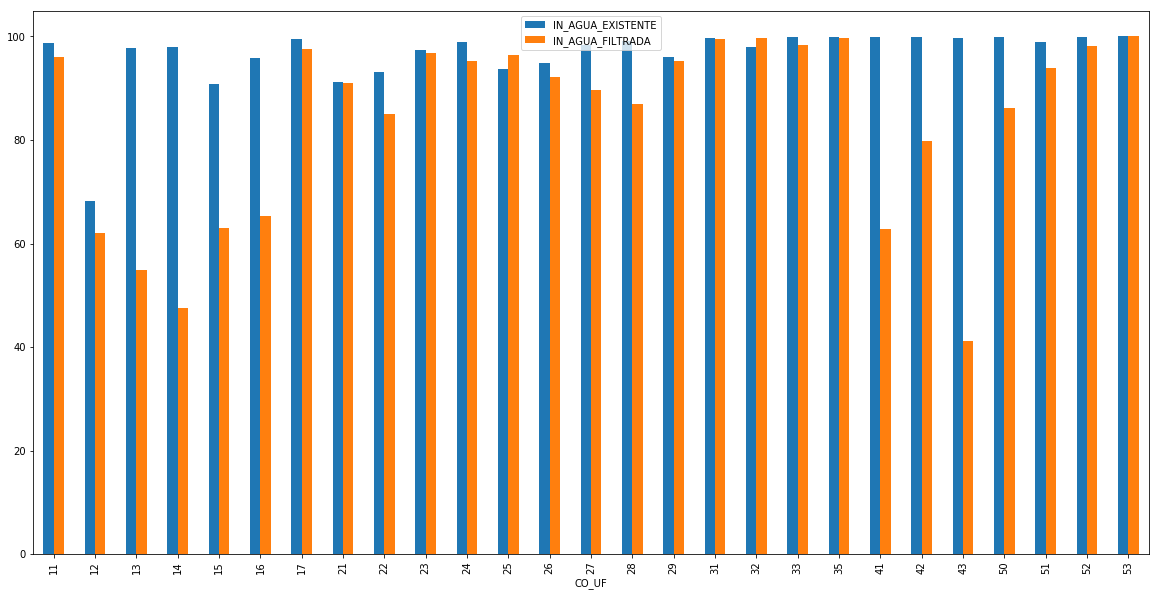

In [195]:
df_5 = df_all[['CO_UF', 'IN_AGUA_EXISTENTE', 'IN_AGUA_FILTRADA']].groupby('CO_UF') \
            .agg(lambda x: round((x.sum() * 100) / x.count(), 2))
df_5.plot(kind='bar', figsize=(20,10))

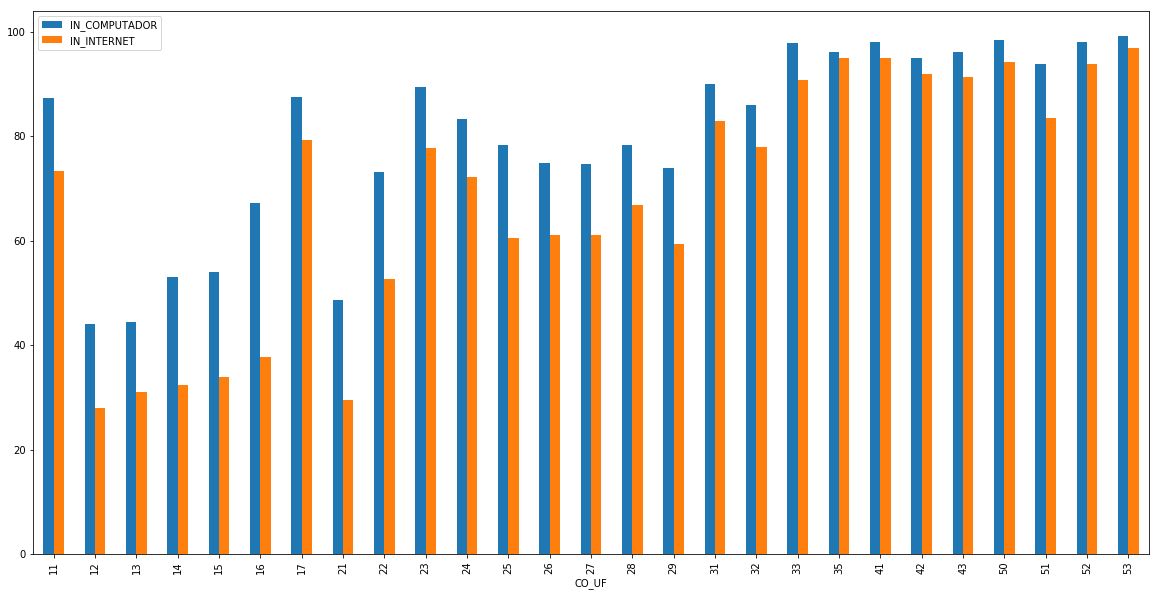

In [197]:
df_5 = df_all[['CO_UF', 'IN_COMPUTADOR', 'IN_INTERNET']].groupby('CO_UF') \
            .agg(lambda x: round((x.sum() * 100) / x.count(), 2))
df_5.plot(kind='bar', figsize=(20,10))